# 5) Data Analytics II 
1. Implement logistic regression using Python/R to perform classification on 
Social_Network_Ads.csv dataset. 
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall 
on the given dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , classification_report


In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
# Male : 1 Female : 0
df['Gender'].replace({'Male' : 1 , 'Female' : 0} , inplace=True)

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [7]:
x = df[['Gender', 'Age', 'EstimatedSalary']]
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [8]:
y = df[['Purchased']]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
lr = LogisticRegression()

In [11]:
lr.fit(X_train,y_train)

C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [13]:
accuracy = accuracy_score(y_test , y_pred)
accuracy

0.89

In [27]:
error_rate = 1 - accuracy
round(error_rate,2)

0.11

# Confusion Matrix

In [14]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[61,  2],
       [ 9, 28]], dtype=int64)

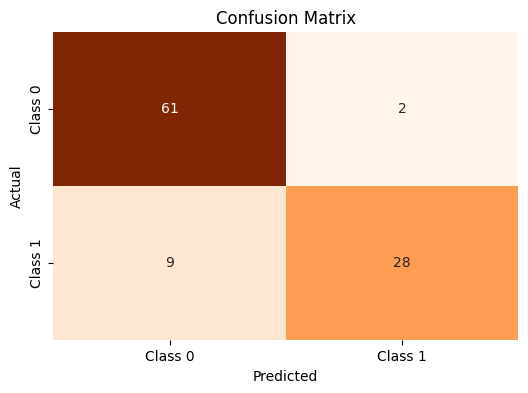

In [15]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Sequence TN , FP , FN , 

In [17]:
#        Predicted
#          0   1
# Actual 0  TN  FP
#        1  FN  TP


In [18]:
precision = precision_score(y_test,y_pred)
precision

0.9333333333333333

In [19]:
recall = recall_score(y_test,y_pred)
recall

0.7567567567567568

In [20]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        63
           1       0.93      0.76      0.84        37

    accuracy                           0.89       100
   macro avg       0.90      0.86      0.88       100
weighted avg       0.89      0.89      0.89       100



# See Formulae for Precision Recall 


# Precision
Precision measures the accuracy of positive predictions, calculated as the ratio of true positives to the total predicted positives. A high precision indicates that most of the positive predictions are correct.
Precision= TP / TP+FP

 



# Recall 
measures the proportion of actual positives that are correctly identified. It is calculated as the ratio of true positives to the total actual positives.
Recall= TP / TP+FN


 



# True Positive Rate (TPR)
indicates how well a model identifies positive instances.

Formula same as Recall

# True Negative Rate (TNR)
indicates how well a model avoids false positives.

FPR = FP/(FP+TN)